###  <font size="3"> <center> <h1>Deteksi Penipuan Asuransi dengan Algoritma Klasifikasi </h1> </center> 

Anggota Kelompok 1 :<br>
   <span style="color:green">&#9881;</span> Nova Zidane Ibrahim     (18/428668/TK/47170)<br>
   <span style="color:green">&#9881;</span> Muhammad Luqman Al Helmy (18/431098/TK/47691)<br>
   <span style="color:green">&#9881;</span> Siti Annisa Aulia       (18/431116/TK/47709)<br>

## a. Memanggil Modul atau _Library_ yang Digunakan

Langkah pertama yaitu memanggil modul atau _library_ yang akan digunakan untuk melakukan _data understanding_.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

## b. Membaca dan Menampilkan _Dataset_ yang Digunakan

Pada langkah kedua ini, kita perlu membaca _dataset_ terlebih dahulu dan menampilkannya sebelum dilanjutkan ke tahap berikutnya. Pembacaan dan penampilan _dataset_ menggunakan modul Pandas. ___Dataset_ yang digunakan dalam bentuk CSV__. Kemudian data disimpan di dalam _Data Frame_ sebagai df.

In [2]:
data = pd.read_csv('Data Asuransi.csv')
print(data.shape)
data.head()

(1000, 40)


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Menampilkan deskripsi target deteksi : __kolom "fraud_reported"__

In [3]:
#classe imbalance
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Data 'tidak _fraud_' sebanyak 753 baris dan data '_fraud_' 247 baris.

In [4]:
# Mengubah kategori N menjadi binary 0 dan kategori Y menjadi binary 1

data['fraud_reported'] = pd.Series(map(lambda x: dict(Y=1, N=0)[x], 
                                       data['fraud_reported'].values.tolist()), data.index)

<AxesSubplot:>

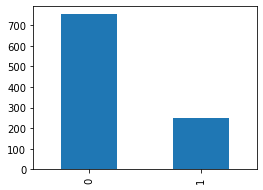

In [5]:
# Menampilkan grafik inbalance fitur target fraud_reported

%matplotlib inline
data['fraud_reported'].value_counts().plot(kind = 'bar', figsize = (4,3))

## c. Melakukan Data Preprocessing

Melakukan persiapan data sebelum dilakukan pemodelan, seperti : <div>
- Melihat korelasi antara kolom fitur dan kolom target
- Seleksi fitur

__Menampilkan deskripsi fitur dataset : nama fitur, tipe data fitur, elemen data fitur, jumlah nilai NaN, dan jumlah elemen data fitur.__

In [6]:
def levels(df):
    return (pd.DataFrame({'dtype':df.dtypes, 
                         'levels':df.nunique(), 
                         'uni_values':[df[x].unique() for x in df.columns],
                         'null_values':df.isna().sum(),
                         'unique':df.nunique()}))
levels(data)

,dtype,levels,uni_values,null_values,unique
months_as_customer,int64,391,"[328, 228, 134, 256, 137, 165, 27, 212, 235, 4...",0,391
age,int64,46,"[48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...",0,46
policy_number,int64,1000,"[521585, 342868, 687698, 227811, 367455, 10459...",0,1000
policy_bind_date,object,951,"[2014-10-17, 2006-06-27, 2000-09-06, 1990-05-2...",0,951
policy_state,object,3,"[OH, IN, IL]",0,3
policy_csl,object,3,"[250/500, 100/300, 500/1000]",0,3
policy_deductable,int64,3,"[1000, 2000, 500]",0,3
policy_annual_premium,float64,991,"[1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...",0,991
umbrella_limit,int64,11,"[0, 5000000, 6000000, 4000000, 3000000, 800000...",0,11
insured_zip,int64,995,"[466132, 468176, 430632, 608117, 610706, 47845...",0,995


__Fitur atau kolom 'c39' hanya berisi nilai _missing value_ atau NaN sehingga 'c39' dapat dihilangkan dari dataset.__

In [7]:
data.drop('_c39',axis=1,inplace=True)

__Mengganti data '?' menjadi 'other' atau disingkat 'oth'.__

In [8]:
data.replace('?','oth',inplace=True)

__Melihat hubungan antara fitur 'fraud_reported' (banyaknya penipuan terlaporkan) dan 'months_as_customer' (berapa lama menjadi klien asuransi)__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

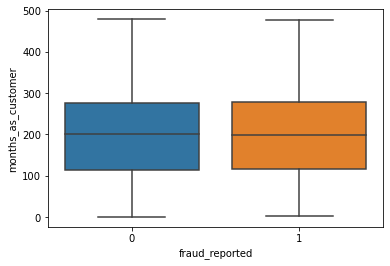

In [9]:
sns.boxplot(data.fraud_reported,data.months_as_customer,orient='v')

__Mengelompokkan banyaknya kasus penipuan terlapor atau fraud_reported berdasarkan standar deviasi months_as_customer__, dimana <div>
- fraud_reported yang terlapor 0 rata-rata berada pada klien yang berlangganan asuransi selama 113 bulan
- fraud_reported yang terlapor 1 rata-rata berada pada klien yang berlangganan asuransi selama 120 bulan

In [10]:
data.groupby('fraud_reported').agg({'months_as_customer':'std'})

,months_as_customer
fraud_reported,
0,113.574565
1,119.824064


__Menampilkan grafik hubungan antara 'fraud_reported' dan 'months_as_customer'.__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\li

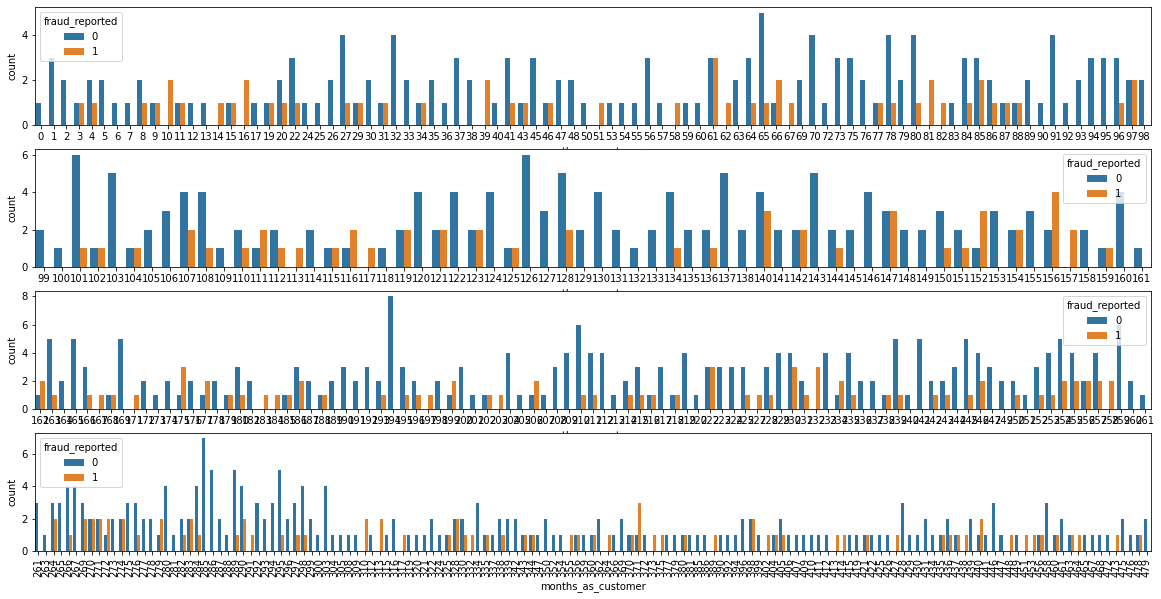

In [11]:
df = data.sort_values('months_as_customer').reset_index(drop=True) # menampilkan banyaknya fraud_reported 
                                                                   # berdasarkan months_as_customer
fig_dims = (20, 10)
fig, ax =plt.subplots(4,1,figsize=fig_dims)
sns.countplot(df.months_as_customer.loc[0:199],orient='v',hue=df['fraud_reported'], ax=ax[0])
sns.countplot(df.months_as_customer.loc[200:399],orient='v',hue=df['fraud_reported'], ax=ax[1])
sns.countplot(df.months_as_customer.loc[400:699],orient='v',hue=df['fraud_reported'], ax=ax[2])
sns.countplot(df.months_as_customer.loc[700:],orient='v',hue=df['fraud_reported'], ax=ax[3])
plt.xticks(rotation=90)
fig.show()

In [12]:
data['months_as_customer'].max() # menampilkan data months_as_curtomer terlama

479

In [13]:
bins = [-1, 60, 120, 180, 240, 300, 360, 420, 480] # Mengelompokkan jumlah data fraud_reported 
                                                   # per 5 tahun months_as_customer
data['year_bin'] = pd.cut(data['months_as_customer'], bins)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year_bin', ylabel='count'>

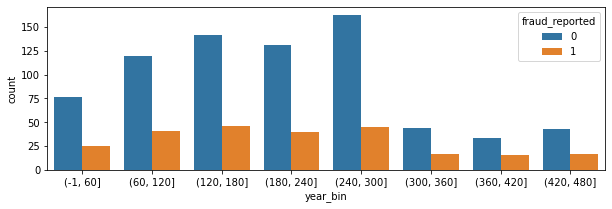

In [14]:
plt.figure(figsize=(10,3))
sns.countplot(data.year_bin,orient='v',hue=data['fraud_reported'])

__Berdasarkan grafik di atas, tidak terdapat perubahan rasio antara fraud_reported 0 dan 1 yang signifikan di setiap 5 tahunnya month_as_customer. Artinya, fitur months_as_customer tidak berpengaruh terhadap hasil target, maka fitur tersebut dihapus dari dataset.__

In [15]:
data.drop('months_as_customer',axis=1,inplace=True)

__Melihat hubungan antara fitur 'fraud_reported' (banyaknya penipuan terlaporkan) dan 'policy_number' (nomor polis klien)__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='policy_number'>

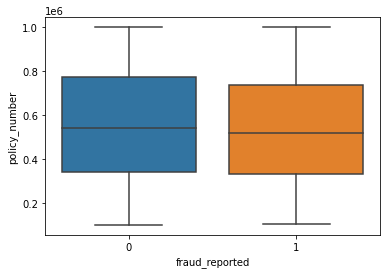

In [16]:
sns.boxplot(data.fraud_reported,data.policy_number,orient='v')

In [17]:
data.groupby('fraud_reported').agg({'policy_number':'std'})

,policy_number
fraud_reported,
0,257323.903505
1,256334.029066


__Berdasarkan visualisasi di atas, tampak bahwa setiap klien memiliki nomor polis yang berbeda, dapat juga dilihat dari jumlah elemen unik fitur policy_number yang berjumlah 1000 (sama dengan jumlah datapoint/baris dari dataset). Artinya, fitur months_as_customer tidak berpengaruh terhadap hasil target, maka fitur tersebut dihapus dari dataset.__

In [18]:
data.drop('policy_number',axis=1,inplace=True)

__Melihat hubungan antara fitur 'fraud_reported' (banyaknya penipuan terlaporkan) dan 'policy_state' (lokasi polis).__ <div>
- OH = Ohio
- IN = Indiana
- IL = Illinois

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_state', ylabel='count'>

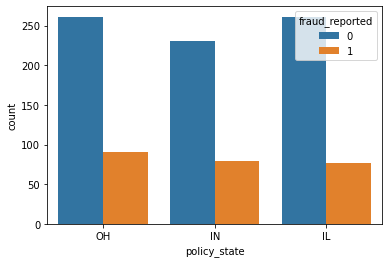

In [19]:
sns.countplot(data.policy_state,orient='v',hue=data['fraud_reported'])

__Berdasarkan grafik di atas, tidak terdapat perubahan rasio antara fraud_reported 0 dan 1 yang signifikan di setiap lokasi polis. Banyaknya reported 0 dan 1 tiap lokasi tidak berbeda jauh. Artinya, fitur policy_state berpengaruh terhadap hasil target, maka fitur tersebut  dipertahankan dari dataset.__

__Melihat hubungan antara fitur 'fraud_reported' (banyaknya penipuan terlaporkan) dan 'umbrella_limit' (asuransi tambahan yang memberikan perlindungan di luar batas pertanggungan polis yang ada).__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

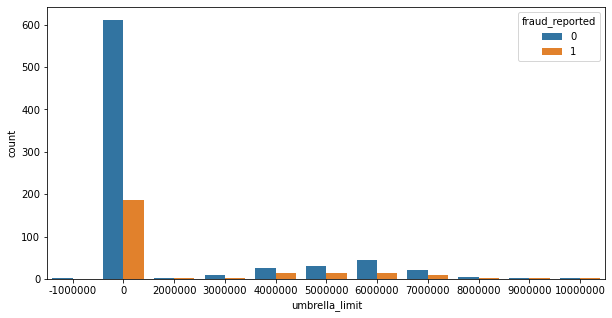

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data.umbrella_limit,orient='v',hue=data['fraud_reported'])

__Berdasarkan grafik di atas, tampak bahwa pada setiap nominal umbrella_limit, fraud_reported memiliki rasio yang berbeda-beda. Artinya, fitur policy_state berpengaruh terhadap hasil target, maka fitur tersebut  dipertahankan dari dataset.__

__Melihat hubungan antara target 'fraud_reported' (banyaknya penipuan terlaporkan) dengan fitur 'incident_city' (kota pelaporan), 'incident_location' (alamat pelaporan), 'incident_type' (tipe insiden), 'incident_state' (negara bagian pelaporan).__

In [21]:
data[['incident_city','incident_location','fraud_reported']].head(10)

,incident_city,incident_location,fraud_reported
0,Columbus,9935 4th Drive,1
1,Riverwood,6608 MLK Hwy,1
2,Columbus,7121 Francis Lane,0
3,Arlington,6956 Maple Drive,1
4,Arlington,3041 3rd Ave,0
5,Arlington,8973 Washington St,1
6,Springfield,5846 Weaver Drive,0
7,Columbus,3525 3rd Hwy,0
8,Arlington,4872 Rock Ridge,0
9,Hillsdale,3066 Francis Ave,0


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_city', ylabel='count'>

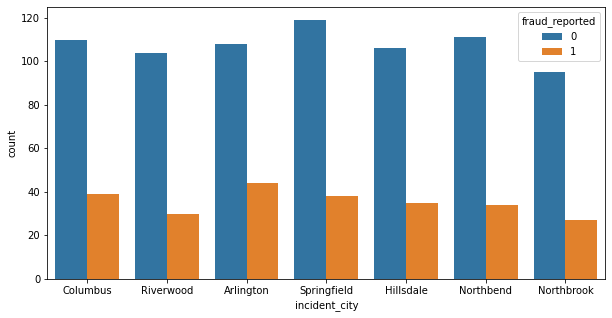

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data.incident_city,orient='v',hue=data['fraud_reported'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_state', ylabel='count'>

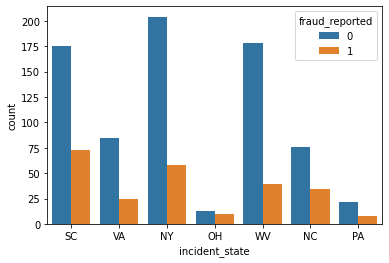

In [23]:
sns.countplot(data.incident_state,orient='v',hue=data['fraud_reported'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_type', ylabel='count'>

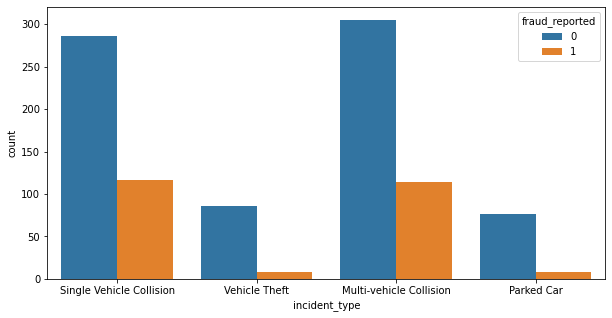

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data.incident_type,orient='v',hue=data['fraud_reported'])

In [25]:
data['pin']= data["incident_location"].str.slice(0,4,1) # Memisahkan nomor rumah dan nama jalan 
                                                        # pada fitur "incident_location"

__Berdasarkan visualisasi di atas, tampak bahwa pada setiap fitur 'incident_city' (kota pelaporan), 'incident_type' (tipe insiden), dan'incident_state' (negara bagian pelaporan), fraud_reported terlapor pada setiap elemen dari fitur memiliki rentang yang berbeda-beda. Artinya, fitur 'incident_city' (kota pelaporan), 'incident_type' (tipe insiden), dan'incident_state' (negara bagian pelaporan) berpengaruh terhadap hasil target, maka fitur tersebut  dipertahankan dari dataset. Sedangkan fitur 'incident_location' (alamat pelaporan) yang pastinya setiap polis/klien berbeda-beda, tidak berpengaruh pada fraud_reported.__

In [26]:
data.drop('incident_location',axis=1,inplace=True)

__Menampilkan kolom baru berisi pin (nomor rumah)__

In [27]:
data['pin']

0      9935
1      6608
2      7121
3      6956
4      3041
       ... 
995    6045
996    3092
997    7629
998    6128
999    1416
Name: pin, Length: 1000, dtype: object

In [28]:
data.pin.nunique()

939

In [29]:
df = data[['pin','fraud_reported']][data['pin'].isin(data['pin'].value_counts()[data['pin'].value_counts()>1].index)]

__Menampilkan plot data antara jumlah fraud_reported terhadap jumlah pin (nomor rumah) yang sama.__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pin', ylabel='count'>

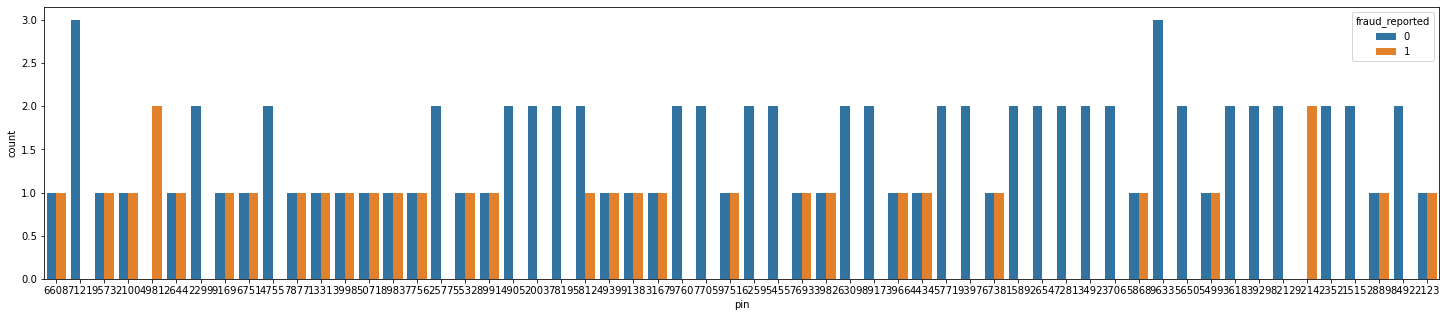

In [30]:
plt.figure(figsize=(25,5))
sns.countplot(df.pin,orient='v',hue=df['fraud_reported'])

__Menampilkan plot data antara jumlah fraud_reported terhadap jumlah pin (nomor rumah) yang berbeda.__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pin', ylabel='count'>

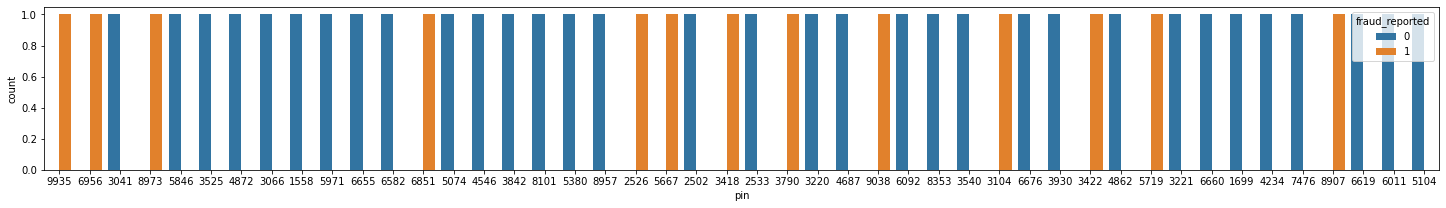

In [31]:
df = data[['pin','fraud_reported']][data['pin'].isin(data['pin'].value_counts()[data['pin'].value_counts()==1].index)]
plt.figure(figsize=(25,3))
sns.countplot(df.pin.loc[:50],orient='v',hue=df['fraud_reported'])

__Menampilkan plot data antara jumlah fraud_reported terhadap jumlah pin (nomor rumah).__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pin', ylabel='count'>

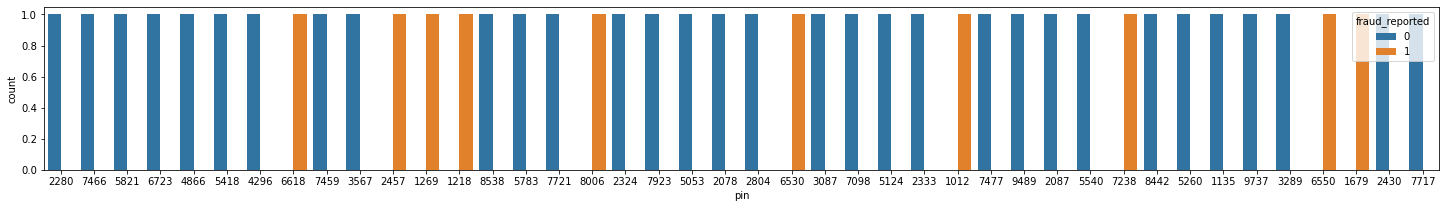

In [32]:
plt.figure(figsize=(25,3))
sns.countplot(df.pin.loc[51:100],orient='v',hue=df['fraud_reported'])

In [33]:
data['pin'].max() # Pin atau nomor rumah bernilai terbesar.

'9988'

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='pin'>

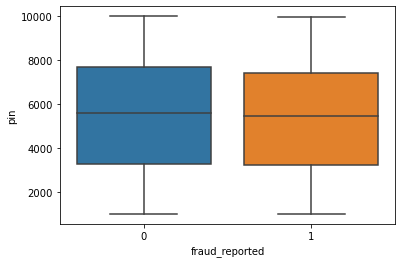

In [34]:
sns.boxplot(data.fraud_reported,data.pin.astype('int'),orient='v')

In [35]:
bins = [0,2000,4000,6000,8000,10000]
data['pin_bin'] = pd.cut(data['pin'].astype('int'), bins)
data.drop('pin',axis=1,inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pin_bin', ylabel='count'>

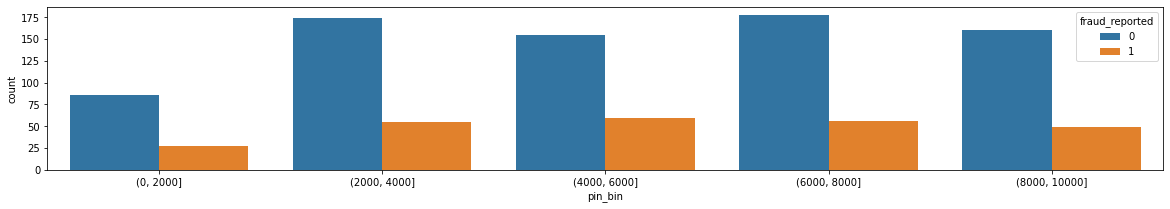

In [36]:
plt.figure(figsize=(20,3))
sns.countplot(data.pin_bin,orient='v',hue=data['fraud_reported'])

__Berdasarkan visualisasi di atas (dimana banyaknya fraud_reported dikelompokkan kedalam rentang pin atau nomor rumah dalam rentang kelipatan 2000),tampak bahwa pada setiap rentang pin_bin, fraud_reported memiliki rasio yang berbeda-beda. Artinya, fitur pin_bin berpengaruh terhadap hasil target, maka fitur tersebut  digunakan sebagai pengganti dari fitur incident_location.__

__Menampilkan plot data antara jumlah fraud_reported terhadap insured_occupation (asuransi pekerjaan).__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

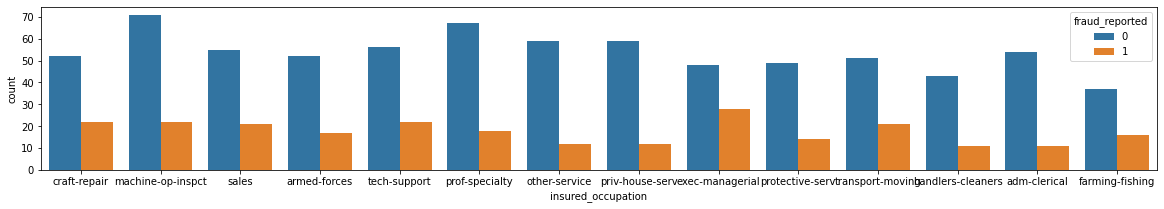

In [37]:
plt.figure(figsize=(20,3))
sns.countplot(data.insured_occupation,orient='v',hue=data['fraud_reported'])

__Menampilkan plot data antara jumlah fraud_reported terhadap insured_education_level (asuransi pendidikan).__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

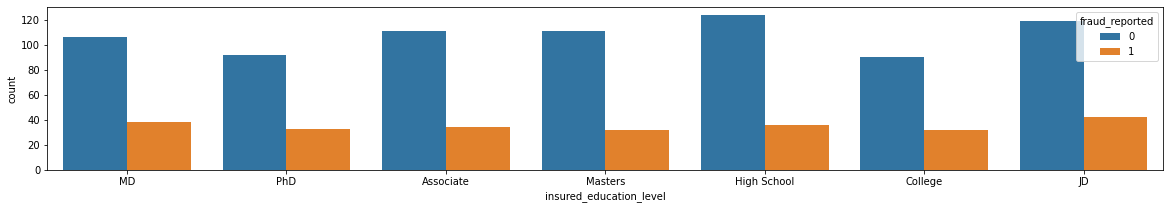

In [38]:
plt.figure(figsize=(20,3))
sns.countplot(data.insured_education_level,orient='v',hue=data['fraud_reported'])

__Menampilkan plot data antara jumlah fraud_reported terhadap insured_hobbies (asuransi hobi).__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

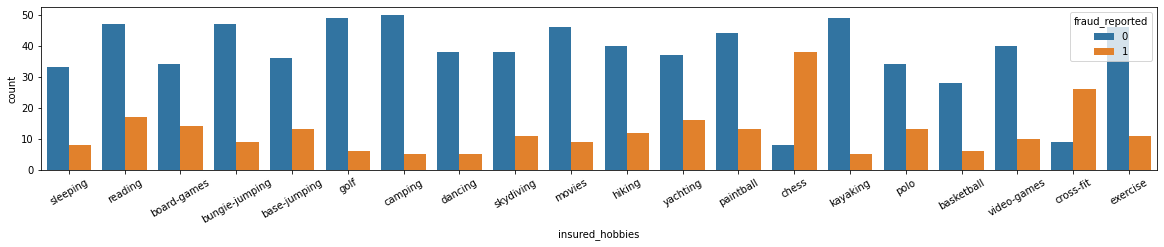

In [39]:
plt.figure(figsize=(20,3))
sns.countplot(data.insured_hobbies,orient='v',hue=data['fraud_reported'])
plt.xticks(rotation=30)

__Terlihat bahwa penipuan dominansi di hobi chess dan cross_fit.__ <div>
Untuk lebih jelasnya dilakukan perbandingan/rasio antara laporan terjadi fraud dan laporan tidak terjadi fraud.

In [40]:
df = data.groupby('insured_hobbies')['fraud_reported'].value_counts().unstack().reset_index()
df['ratio_1/0'] = df[1]/df[0]
df

fraud_reported,insured_hobbies,0,1,ratio_1/0
0,base-jumping,36,13,0.361111
1,basketball,28,6,0.214286
2,board-games,34,14,0.411765
3,bungie-jumping,47,9,0.191489
4,camping,50,5,0.100000
5,chess,8,38,4.750000
6,cross-fit,9,26,2.888889
7,dancing,38,5,0.131579
8,exercise,46,11,0.239130
9,golf,49,6,0.122449


In [41]:
df.sort_values('ratio_1/0')

fraud_reported,insured_hobbies,0,1,ratio_1/0
4,camping,50,5,0.100000
11,kayaking,49,5,0.102041
9,golf,49,6,0.122449
7,dancing,38,5,0.131579
3,bungie-jumping,47,9,0.191489
12,movies,46,9,0.195652
1,basketball,28,6,0.214286
8,exercise,46,11,0.239130
17,sleeping,33,8,0.242424
18,video-games,40,10,0.250000


__Benar, rasio terbesar terjadi di hobi chess dan cross_fit.__

In [42]:
data = data.merge(df[['insured_hobbies','ratio_1/0']], on = 'insured_hobbies', how='left')

In [43]:
data['insured_hobbies'][data['ratio_1/0']<=0.15] = 'h1' # h1 = rasio kurang dari sama dengan 0,15
data['insured_hobbies'][(data['ratio_1/0']>0.15)&(data['ratio_1/0']<=0.25)] = 'h2' # h2 = rasio 0,15 sampai 0,25
data['insured_hobbies'][(data['ratio_1/0']>0.25)&(data['ratio_1/0']<=0.35)] = 'h3' # h3 = rasio 0,25 sampai 0,35
data['insured_hobbies'][(data['ratio_1/0']>0.35)&(data['ratio_1/0']<=0.45)] = 'h4' # h4 = rasio 0,35 sampai 0,45
data['insured_hobbies'][(data['ratio_1/0']>0.45)&(data['ratio_1/0']<=3)] = 'h5' # h5 = rasio 0,45 sampai 3
data['insured_hobbies'][(data['ratio_1/0']>3)] = 'h6' # h6 = rasio lebih dari 3

<ipython-input-43-a4989080f51f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['insured_hobbies'][data['ratio_1/0']<=0.15] = 'h1' # h1 = rasio kurang dari sama dengan 0,15
<ipython-input-43-a4989080f51f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['insured_hobbies'][(data['ratio_1/0']>0.15)&(data['ratio_1/0']<=0.25)] = 'h2' # h2 = rasio 0,15 sampai 0,25
<ipython-input-43-a4989080f51f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'h2'),
  Text(1, 0, 'h4'),
  Text(2, 0, 'h1'),
  Text(3, 0, 'h3'),
  Text(4, 0, 'h6'),
  Text(5, 0, 'h5')])

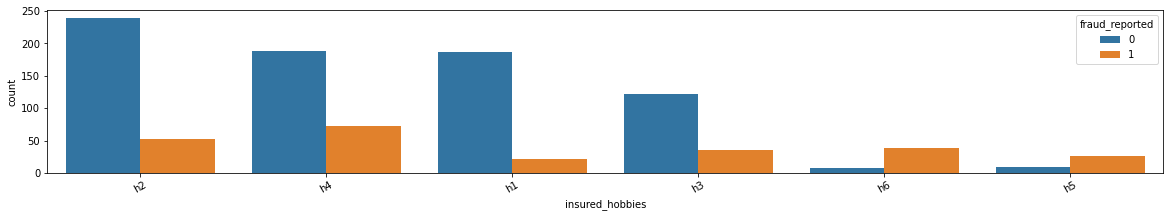

In [44]:
plt.figure(figsize=(20,3))
sns.countplot(data.insured_hobbies,orient='v',hue=data['fraud_reported'])
plt.xticks(rotation=30)

__Berdasarkan diagram batang di atas, tampak bahwa mayoritas fraud/penipuan terjadi di rentang h4 (rasio 0,35 sampai 0,45).__ 

__Melihat adanya perbedaan rasio fraud_reported antar hobi, pekerjaan, dan pendidikan, maka artinya ketiga fitur tersebut tetap dipertahankan dari pemodelan.__

__Menampilkan plot data antara jumlah fraud_reported terhadap fitur age (umur).__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

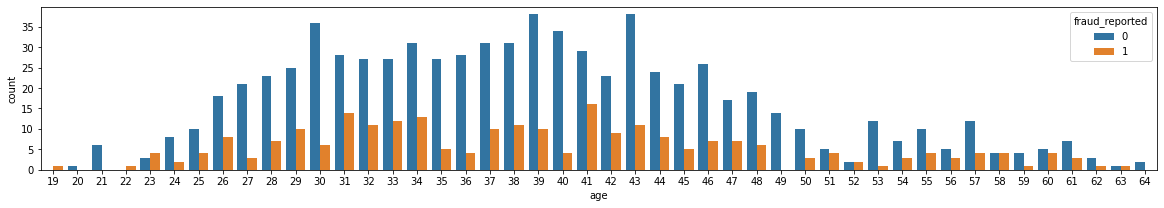

In [45]:
plt.figure(figsize=(20,3))
sns.countplot(data.age,orient='v',hue=data['fraud_reported'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='age'>

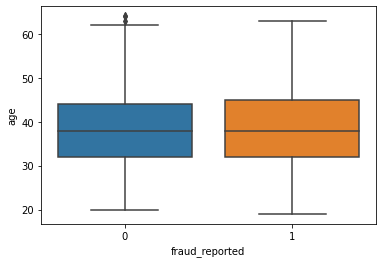

In [46]:
sns.boxplot(data.fraud_reported,data.age,orient='v')

__Melihat hubungan fraud_reported dan fitur age berdasarkan pengelompokkan rentang umur.__

In [47]:
bins = [18, 22, 35, 50, 65]
data['age_bin'] = pd.cut(data['age'], bins)

In [48]:
data.drop('age',axis=1,inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_bin', ylabel='count'>

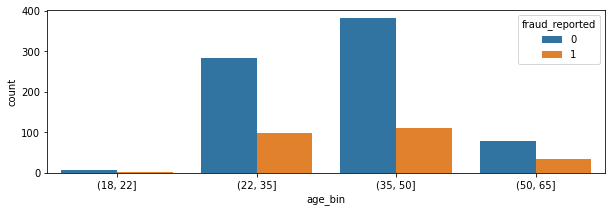

In [49]:
plt.figure(figsize=(10,3))
sns.countplot(data.age_bin,orient='v',hue=data['fraud_reported'])

__Berdasarkan visualisasi di atas (dimana banyaknya fraud_reported dikelompokkan kedalam rentang umur),tampak bahwa pada setiap rentang age_bin, fraud_reported memiliki rasio yang berbeda-beda. Tampak bahwa rentang umur yang banyak memakai asuransi berada di umur 35 hingga 50 tahun. Artinya, fitur age_bin berpengaruh terhadap hasil target, maka fitur tersebut dapat digunakan sebagai pengganti dari fitur age.__

__Menampilkan plot data antara jumlah fraud_reported terhadap fitur buatan policy_age (lamanya asuransi dimulai dari waktu pertanggungan asuransi dimulai hingga terjadinya incident).__

In [50]:
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date']) # mengubah tipe data policy_bind_date menjadi tipe datetime
data['incident_date'] = pd.to_datetime(data['incident_date']) # mengubah tipe data incident_date menjadi tipe datetime

In [51]:
data['policy_age'] = data['incident_date'] - data['policy_bind_date']
data['policy_age'] = data['policy_age'].astype('str')
data['policy_age'] = data['policy_age'].str.slice(0,-5,1)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='policy_age'>

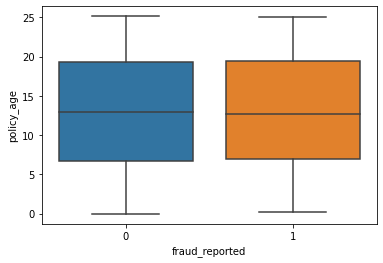

In [52]:
sns.boxplot(data.fraud_reported,data.policy_age.astype('int')/365,orient='v')

In [53]:
data['policy_age'].astype('int').max()/365

25.12876712328767

In [54]:
bins = [-1, 5, 10, 15, 20, 26]
data['policy_age_bin'] = pd.cut(data['policy_age'].astype('int')/365, bins)
data.drop('policy_age',axis=1,inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='policy_age_bin', ylabel='count'>

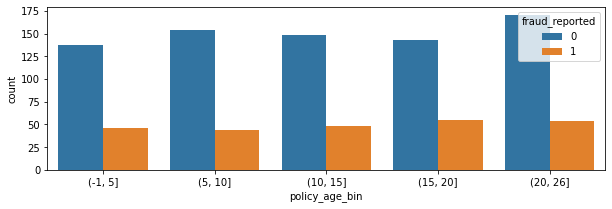

In [55]:
plt.figure(figsize=(10,3))
sns.countplot(data.policy_age_bin,orient='v',hue=data['fraud_reported'])

__Berdasarkan visualisasi di atas (dimana banyaknya fraud_reported dikelompokkan kedalam rentang setiap 5 tahun lamanya asuransi),tampak bahwa pada setiap rentang policy_age_bin terdapat perbedaan yang signifikan antar rentang. Artinya, fitur berpengaruh terhadap hasil target seperti policy_bind_date,incident_date dan autor_year dapat digantikan oleh fitur policy_age_bin.__

__Membuat fitur baru 'age_at_incident' dari pengurangan antara waktu terjadinya incident dan tanggal kendaraan.__

In [56]:
data['age_at_incident'] = data['incident_date'].astype('str').str.slice(0,4,1).astype('int') - data['auto_year']

In [57]:
data.drop(['policy_bind_date','incident_date','auto_year'],axis=1,inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_at_incident', ylabel='count'>

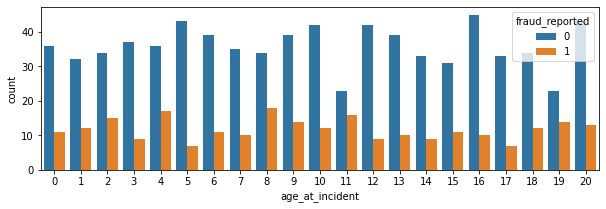

In [58]:
plt.figure(figsize=(10,3))
sns.countplot(data.age_at_incident,orient='v',hue=data['fraud_reported'])

__Berdasarkan visualisasi di atas (dimana banyaknya fraud_reported dikelompokkan berdasarkan umur kendaraan saat insiden),tampak bahwa pada setiap rentang age_at_incident, fraud_reported memiliki rasio yang berbeda-beda. Artinya, fitur age_at_incident berpengaruh terhadap hasil target, maka fitur tersebut  dapat dipertahankan.__

__Menampilkan plot data antara jumlah fraud_reported terhadap insured_zip (kode pos pemegang polis/klien asuransi).__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='insured_zip'>

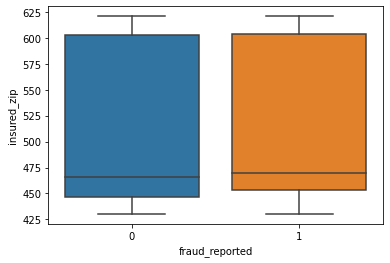

In [59]:
sns.boxplot(data.fraud_reported,data.insured_zip/1000,orient='v')

In [60]:
bins = [42.5, 45, 50, 65]
data['insured_zip_bin'] = pd.cut(data['insured_zip']/10000, bins)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='insured_zip_bin', ylabel='count'>

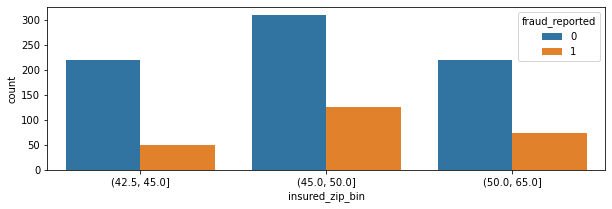

In [61]:
plt.figure(figsize=(10,3))
sns.countplot(data.insured_zip_bin,orient='v',hue=data['fraud_reported'])

__Berdasarkan visualisasi di atas, tampak bahwa setiap klien memiliki insured_zip yang berbeda, dapat juga dilihat dari jumlah elemen unik fitur policy_number yang berjumlah 995. Artinya, fitur insured_zip maupun insured_zip_bin tidak berpengaruh terhadap hasil target, maka kedua fitur tersebut dihapus dari dataset.__

In [62]:
data.drop('insured_zip',axis=1,inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

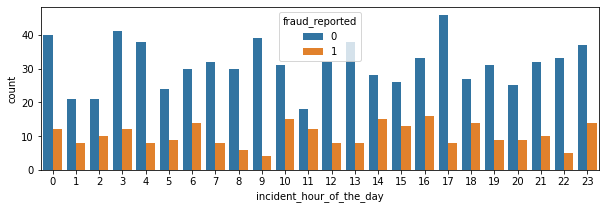

In [63]:
plt.figure(figsize=(10,3))
sns.countplot(data.incident_hour_of_the_day,orient='v',hue=data['fraud_reported'])

__Menampilkan plot data antara jumlah fraud_reported terhadap incident_hour_of_the_day (lama kejadian).__

In [64]:
data['incident_hour_of_the_day'][data['incident_hour_of_the_day']==0]=24
bins = [0, 6, 9, 13, 17, 25]
data['incident_hour_bin'] = pd.cut(data['incident_hour_of_the_day'], bins)
data.drop('incident_hour_of_the_day',axis=1,inplace=True)

<ipython-input-64-4df097a1a729>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['incident_hour_of_the_day'][data['incident_hour_of_the_day']==0]=24


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incident_hour_bin', ylabel='count'>

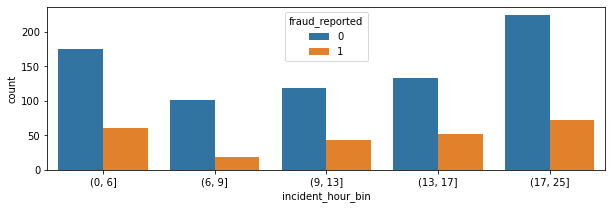

In [65]:
plt.figure(figsize=(10,3))
sns.countplot(data.incident_hour_bin,orient='v',hue=data['fraud_reported'])

__Berdasarkan visualisasi di atas (dimana banyaknya fraud_reported dikelompokkan kedalam rentang incident_hour_bin),tampak bahwa pada setiap rentang incident_hour_bin, fraud_reported memiliki rasio yang berbeda-beda. Artinya, fitur incident_hour_bin berpengaruh terhadap hasil target, maka fitur tersebut dapat digunakan sebagai pengganti dari fitur incident_hour_of_the_day.__

__Menampilkan plot data antara jumlah fraud_reported terhadap perusahaan produksi kendaraan (auto_make).__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='auto_make', ylabel='count'>

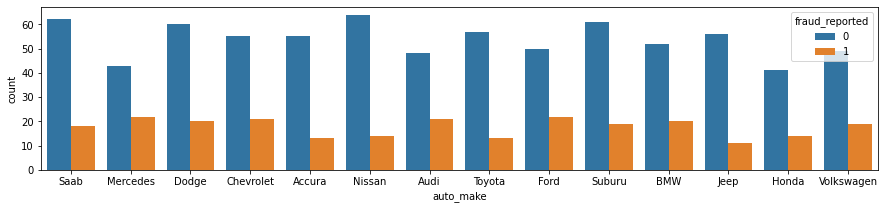

In [66]:
plt.figure(figsize=(15,3))
sns.countplot(data.auto_make,orient='v',hue=data['fraud_reported'])

__Menampilkan plot data antara jumlah fraud_reported terhadap model kendaraan (auto_model).__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

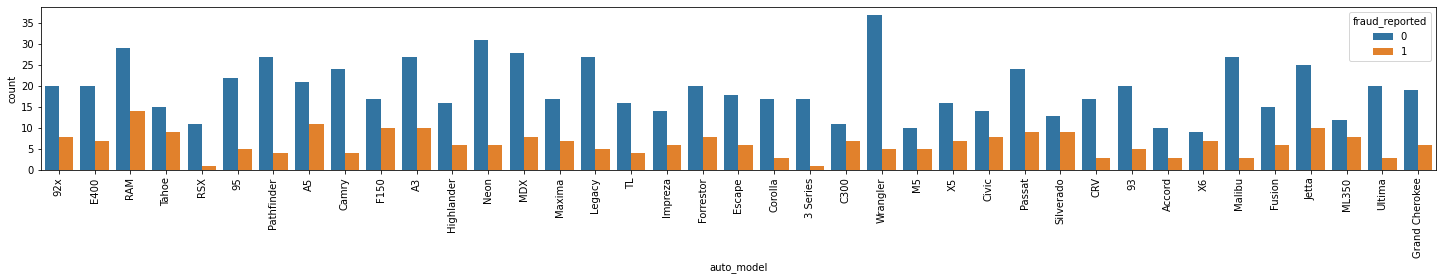

In [67]:
plt.figure(figsize=(25,3))
sns.countplot(data.auto_model,orient='v',hue=data['fraud_reported'])
plt.xticks(rotation=90)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'Saab_92x'),
  Text(1, 0, 'Mercedes_E400'),
  Text(2, 0, 'Dodge_RAM'),
  Text(3, 0, 'Chevrolet_Tahoe'),
  Text(4, 0, 'Accura_RSX'),
  Text(5, 0, 'Saab_95'),
  Text(6, 0, 'Nissan_Pathfinder'),
  Text(7, 0, 'Audi_A5'),
  Text(8, 0, 'Toyota_Camry'),
  Text(9, 0, 'Ford_F150'),
  Text(10, 0, 'Audi_A3'),
  Text(11, 0, 'Toyota_Highlander'),
  Text(12, 0, 'Dodge_Neon'),
  Text(13, 0, 'Accura_MDX'),
  Text(14, 0, 'Nissan_Maxima'),
  Text(15, 0, 'Suburu_Legacy'),
  Text(16, 0, 'Accura_TL'),
  Text(17, 0, 'Suburu_Impreza'),
  Text(18, 0, 'Suburu_Forrestor'),
  Text(19, 0, 'Ford_Escape'),
  Text(20, 0, 'Toyota_Corolla'),
  Text(21, 0, 'BMW_3 Series'),
  Text(22, 0, 'Mercedes_C300'),
  Text(23, 0, 'Jeep_Wrangler'),
  Text(24, 0, 'BMW_M5'),
  Text(25, 0, 'BMW_X5'),
  Text(26, 0, 'Honda_Civic'),
  Text(27, 0,

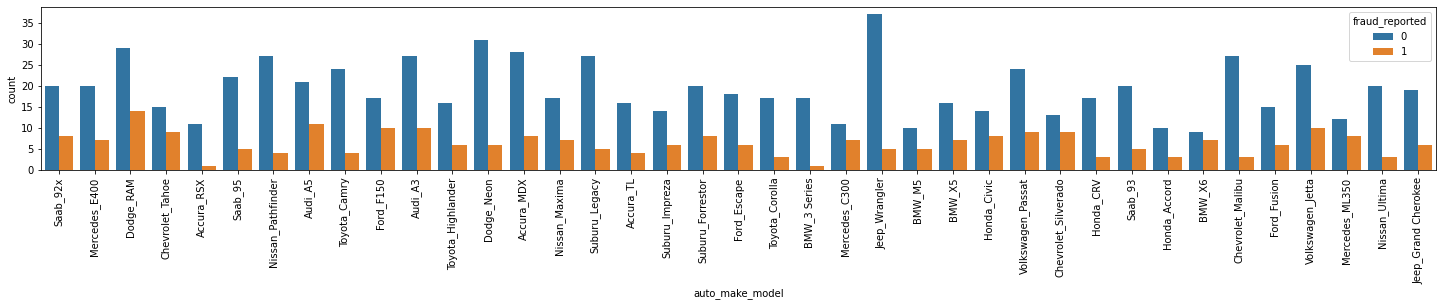

In [68]:
data['auto_make_model']=data['auto_make']+'_'+data['auto_model'] #menggabungkan kolom auto_make dan auto model
plt.figure(figsize=(25,3))
sns.countplot(data.auto_make_model,orient='v',hue=data['fraud_reported'])
plt.xticks(rotation=90)

__Berdasarkan visualisasi di atas (dimana banyaknya fraud_reported dikelompokkan kedalam rentang auto_make_model),tampak bahwa pada setiap rentang auto_make_model, fraud_reported memiliki rasio yang berbeda-beda dan ada yang sama. Artinya, fitur auto_make_model tidak terlalu berpengaruh terhadap hasil target, maka fitur tersebut dapat dihapus dari dataset.__

In [69]:
data.drop(['auto_make','auto_model'],axis=1,inplace=True)

__Menampilkan plot data antara jumlah fraud_reported terhadap policy_annual_premium (pembayaran polis tahunan untuk peristiwa tertentu).__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

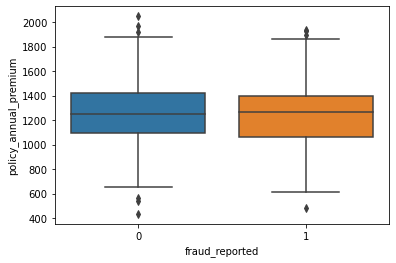

In [70]:
sns.boxplot(data.fraud_reported,data.policy_annual_premium,orient='v')

In [71]:
bins = [0, 500, 1000, 1500, 2500]
data['premium_bin'] = pd.cut(data['policy_annual_premium'], bins)
data.drop('policy_annual_premium',axis=1,inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='premium_bin', ylabel='count'>

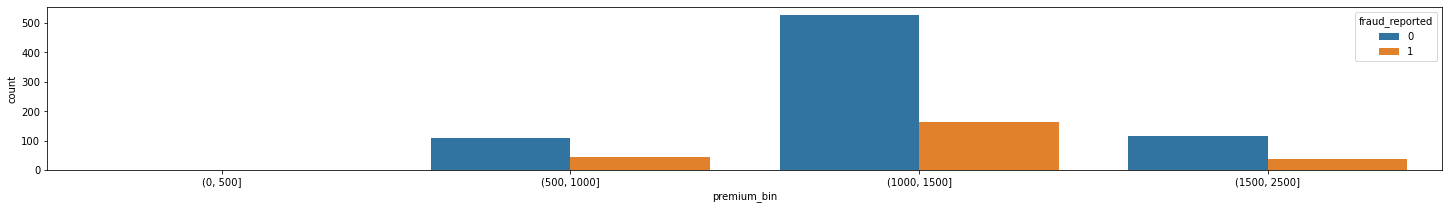

In [72]:
plt.figure(figsize=(25,3))
sns.countplot(data.premium_bin,orient='v',hue=data['fraud_reported'])

__Berdasarkan visualisasi di atas (dimana banyaknya fraud_reported dikelompokkan kedalam rentang premium_bin),tampak bahwa pada setiap rentang premium_bin, fraud_reported memiliki rasio yang berbeda-beda, tampak fraud_reported terbesar berada di rentang 1000 hingga 1500. Artinya, fitur pin_bin berpengaruh terhadap hasil target, maka fitur tersebut  digunakan sebagai pengganti dari fitur policy_annual_premium.__

__Menampilkan plot data antara jumlah fraud_reported terhadap police_report_available (pelaporan polisi).__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

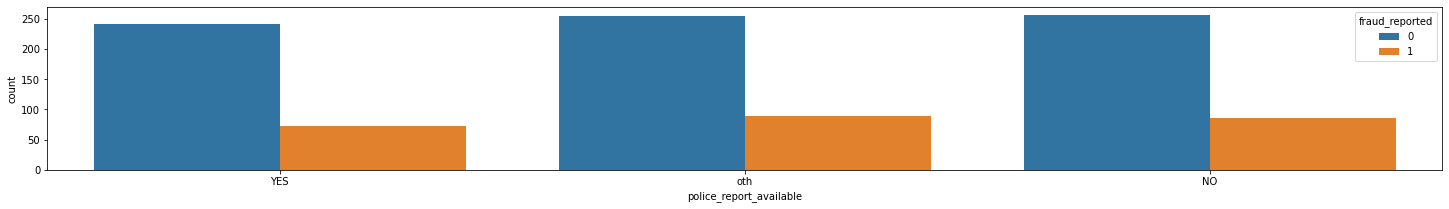

In [73]:
plt.figure(figsize=(25,3))
sns.countplot(data.police_report_available,orient='v',hue=data['fraud_reported'])

__Menampilkan plot data antara jumlah fraud_reported terhadap witnesses (saksi).__

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='witnesses', ylabel='count'>

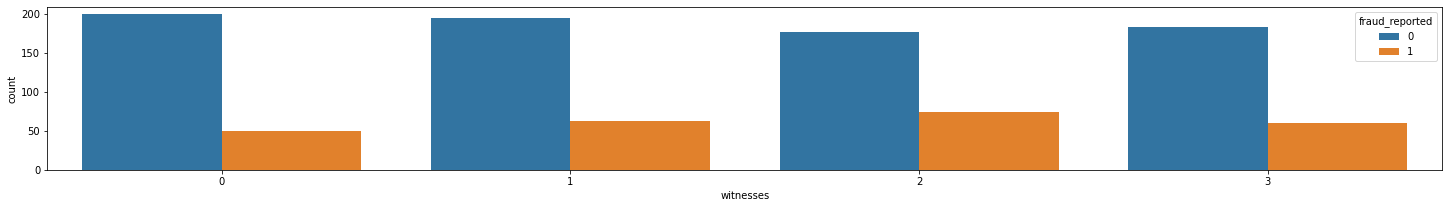

In [74]:
plt.figure(figsize=(25,3))
sns.countplot(data.witnesses,orient='v',hue=data['fraud_reported'])

## d. Melakukan Korelasi Tiap Fitur Terpilih
Langkah ini dilakukan untuk melihat korelasi antar atribut atau fitur yang telah di _preprocessing_ sebelumnya untuk kembali dilakukan pengecekan fitur.

<AxesSubplot:>

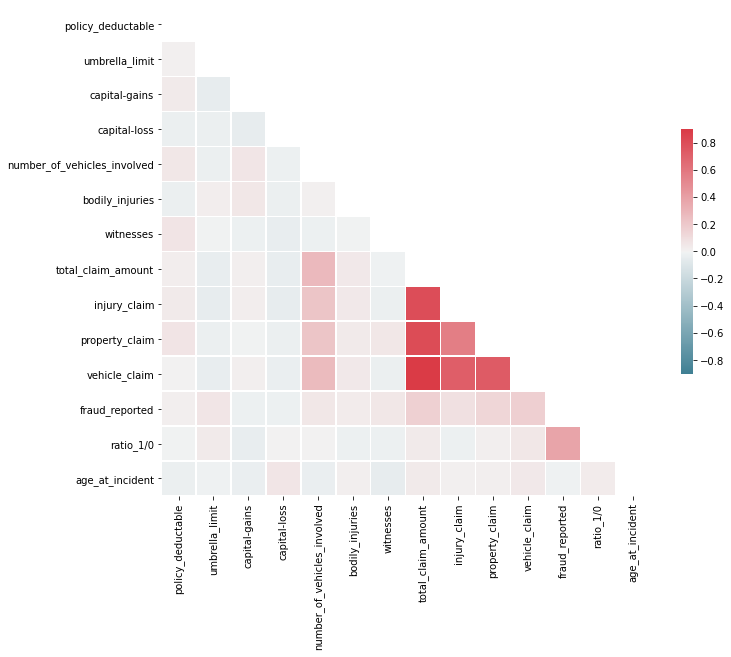

In [75]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, vmin=-.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Korelasi antar fitur `total_claim_amount`, `injury_claim`, `property_claim`, `vehicle_claim` berkorelasi tinggi. Selain itu, fitur `total_claim_amount` juga merupakan total kalkulasi dari `injury_claim`, `property_claim`, `vehicle_claim`. Sehingga fitur `total_claim_amount` yang berkorelasi tinggi tinggi tersebut dapat dihilangkan dari model.

__Mengapa fitur tersebut dihapus?__

<div>Dalam klasifikasi, hasil akhir ditentukan oleh hasil voting beberapa regresi. Dalam regresi, variabel dependen atau target berdistribusi normal dengan variansi. Sehingga diharapkan suatu model harus bervariansi rendah. Oleh karena itulah, fitur yang berkolerasi tinggi dengan pasangannya perlu dihilangkan.

In [76]:
data.drop('total_claim_amount',axis=1,inplace=True)

## e. Dataset Terbaru

__Berikut adalah hasil akhir fitur yang akan digunakan untuk pemodelan klasifikasi:__

In [77]:
data.columns

Index(['policy_state', 'policy_csl', 'policy_deductable', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'injury_claim',
       'property_claim', 'vehicle_claim', 'fraud_reported', 'year_bin',
       'pin_bin', 'ratio_1/0', 'age_bin', 'policy_age_bin', 'age_at_incident',
       'insured_zip_bin', 'incident_hour_bin', 'auto_make_model',
       'premium_bin'],
      dtype='object')

#### Memisahkan kolom fitur dan kolom target

In [78]:
x = data.copy().drop("fraud_reported",axis=1)
y = data["fraud_reported"]

In [79]:
num_cols = ['capital-gains','capital-loss','injury_claim', 
            'property_claim', 'vehicle_claim','ratio_1/0'] # numerik kolom atau fitur
cat_cols = x.columns.difference(num_cols) #semua fitur kecuali num_cols

#### Memisahkan data training (80%) dan data test (20%)

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 200)

In [81]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 35), (200, 35), (800,), (200,))

In [82]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x_train[num_cols])
x_train[num_cols] = scale.transform(x_train[num_cols])
x_test[num_cols] = scale.transform(x_test[num_cols])

<ipython-input-82-a5b7fe5e3732>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[num_cols] = scale.transform(x_train[num_cols])
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-82-a5b7fe5e3732>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

#### Encoding Categorical columns

Dikarenakan masih terdapat beberapa fitur berupa kolom/fitur kategoris, maka gunakan teknik encoding untuk mengubah variabel kategoris menjadi numerik. Teknik ini mengubah setiap nilai kategori menjadi binary number.

In [83]:
from sklearn.preprocessing import LabelEncoder
cols = ['umbrella_limit','insured_occupation','age_at_incident','auto_make_model']
import bisect
for col in cols:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = x_test[col].map(lambda s: 'other' if s not in le.classes_ else s)
    le_classes = le.classes_.tolist()
    #bisect.insort_left(le_classes, 'other')
    le.classes_ = le_classes
    x_test[col] = le.transform(x_test[col])

<ipython-input-83-a0d771cbaf8f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = le.fit_transform(x_train[col])
<ipython-input-83-a0d771cbaf8f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = x_test[col].map(lambda s: 'other' if s not in le.classes_ else s)
<ipython-input-83-a0d771cbaf8f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [84]:
cat_cols = x_train[cat_cols].columns.difference(cols)
cat_cols

Index(['age_bin', 'authorities_contacted', 'bodily_injuries', 'collision_type',
       'incident_city', 'incident_hour_bin', 'incident_severity',
       'incident_state', 'incident_type', 'insured_education_level',
       'insured_hobbies', 'insured_relationship', 'insured_sex',
       'insured_zip_bin', 'number_of_vehicles_involved', 'pin_bin',
       'police_report_available', 'policy_age_bin', 'policy_csl',
       'policy_deductable', 'policy_state', 'premium_bin', 'property_damage',
       'witnesses', 'year_bin'],
      dtype='object')

In [85]:
x_train = pd.get_dummies(x_train,columns=cat_cols,drop_first=False,)
x_test = pd.get_dummies(x_test,columns=cat_cols,drop_first=False,)

In [86]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 122), (200, 122), (800,), (200,))

In [87]:
x_train.columns.difference(x_test.columns)

Index([], dtype='object')

In [88]:
x_test.columns.difference(x_train.columns)

Index([], dtype='object')

## f. Pemodelan dengan Algoritma Klasifikasi

### 1. Logistic Regression

In [89]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=200,max_iter=2000)
lr.fit(x_train,y_train)
train_pred_lr = lr.predict(x_train)
test_pred_lr = lr.predict(x_test)

In [90]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

cm = confusion_matrix(y_test, test_pred_lr)
print("Accuracy on train is:",accuracy_score(y_train,train_pred_lr))
print("Accuracy on test is:",accuracy_score(y_test,test_pred_lr))

Accuracy on train is: 0.8725
Accuracy on test is: 0.88


===============Classification report for test===============
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       149
           1       0.78      0.75      0.76        51

    accuracy                           0.88       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.88      0.88      0.88       200



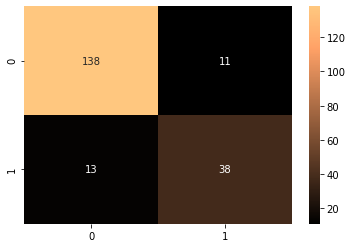

In [91]:
from sklearn.metrics import classification_report

# making a classification report
print("===============Classification report for test===============")
cr = classification_report(y_test,  test_pred_lr)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, test_pred_lr)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

===============Classification report for train===============
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       604
           1       0.77      0.69      0.73       196

    accuracy                           0.87       800
   macro avg       0.83      0.81      0.82       800
weighted avg       0.87      0.87      0.87       800



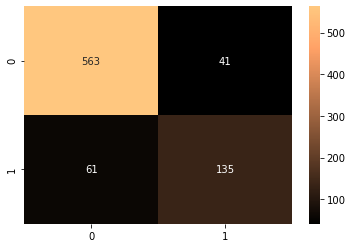

In [92]:
print("===============Classification report for train===============")
cr = classification_report(y_train,  train_pred_lr)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_train, train_pred_lr)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

### 2. Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc
dtc.fit(x_train, y_train)
train_pred_dtc = dtc.predict(x_train)
test_pred_dtc = dtc.predict(x_test)

In [94]:
print("Accuracy on train is:",accuracy_score(y_train,train_pred_dtc))
print("Accuracy on test is:",accuracy_score(y_test,test_pred_dtc))

Accuracy on train is: 1.0
Accuracy on test is: 0.75


In [95]:
dtc

DecisionTreeClassifier()

In [96]:
confusion_matrix(y_test, test_pred_dtc)

array([[126,  23],
       [ 27,  24]], dtype=int64)

In [113]:
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':range(18,27,36)} 
dt_grid = GridSearchCV(DecisionTreeClassifier(),param_grid=parameters,n_jobs=-1,cv=10)
dt_grid.fit(x_train,y_train)
print(dt_grid.best_score_)
print(dt_grid.best_params_)
train_pred_dt_grid = dt_grid.predict(x_train)
test_pred_dt_grid = dt_grid.predict(x_test)

0.7825
{'max_depth': 18}


In [114]:
print("Accuracy on train is:",accuracy_score(y_train,train_pred_dt_grid))
print("Accuracy on test is:",accuracy_score(y_test,test_pred_dt_grid))

Accuracy on train is: 1.0
Accuracy on test is: 0.77


              precision    recall  f1-score   support

           0       0.84      0.86      0.85       149
           1       0.55      0.51      0.53        51

    accuracy                           0.77       200
   macro avg       0.69      0.68      0.69       200
weighted avg       0.76      0.77      0.77       200



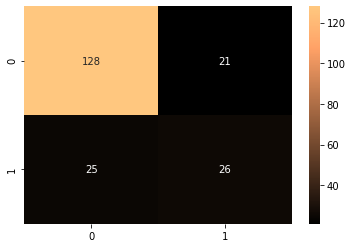

In [115]:
# making a classification report
cr = classification_report(y_test,  test_pred_dt_grid)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, test_pred_dt_grid)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       1.00      1.00      1.00       196

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



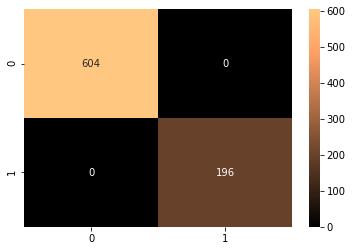

In [116]:
cr = classification_report(y_train,  train_pred_dt_grid)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_train, train_pred_dt_grid)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

rfgrid = rf.best_estimator_
rfgrid.fit(x_train,y_train)

rfgrid.estimators_

plt.figure(figsize=(50,100))
tree.plot_tree(rfgrid.estimators_[0]);fig.savefig('rf_individualtree.png')

### 3. Random Forest Classifier

In [117]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc

parameters={'n_estimators':[100,200],
           'max_features': [6],
           'max_depth':[9,18,27,36,45,54],
           'bootstrap':[True,False]}

rf = GridSearchCV(rfc,param_grid=parameters,n_jobs=-1,cv=10,scoring='accuracy')
rf.fit(x_train,y_train)

Wall time: 1min 6s


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [9, 18, 27, 36, 45, 54],
                         'max_features': [6], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [118]:
rf.best_params_

{'bootstrap': False, 'max_depth': 18, 'max_features': 6, 'n_estimators': 200}

In [119]:
rfgrid = rf.best_estimator_
rfgrid.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=18, max_features=6,
                       n_estimators=200)

In [120]:
train_pred_rfgrid = rfgrid.predict(x_train)
test_pred_rfgrid = rfgrid.predict(x_test)

In [121]:
print("Accuracy on train is:",accuracy_score(y_train,train_pred_rfgrid))
print("Accuracy on test is:",accuracy_score(y_test,test_pred_rfgrid))

Accuracy on train is: 1.0
Accuracy on test is: 0.83


              precision    recall  f1-score   support

           0       0.83      0.97      0.90       149
           1       0.84      0.41      0.55        51

    accuracy                           0.83       200
   macro avg       0.83      0.69      0.72       200
weighted avg       0.83      0.83      0.81       200



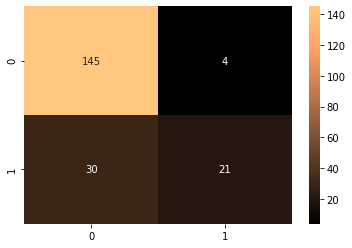

In [122]:
# making a classification report
cr = classification_report(y_test,  test_pred_rfgrid)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_test, test_pred_rfgrid)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       1.00      1.00      1.00       196

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



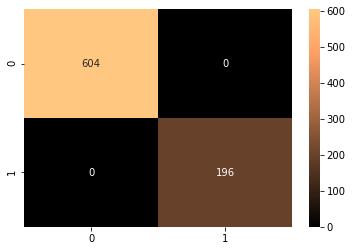

In [123]:
cr = classification_report(y_train,  train_pred_rfgrid)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_train, train_pred_rfgrid)
sns.heatmap(cm, annot = True, cmap = 'copper',fmt='g')
plt.show()

#### Visualisasi salah satu decision tree dari model Random Forest Classifier

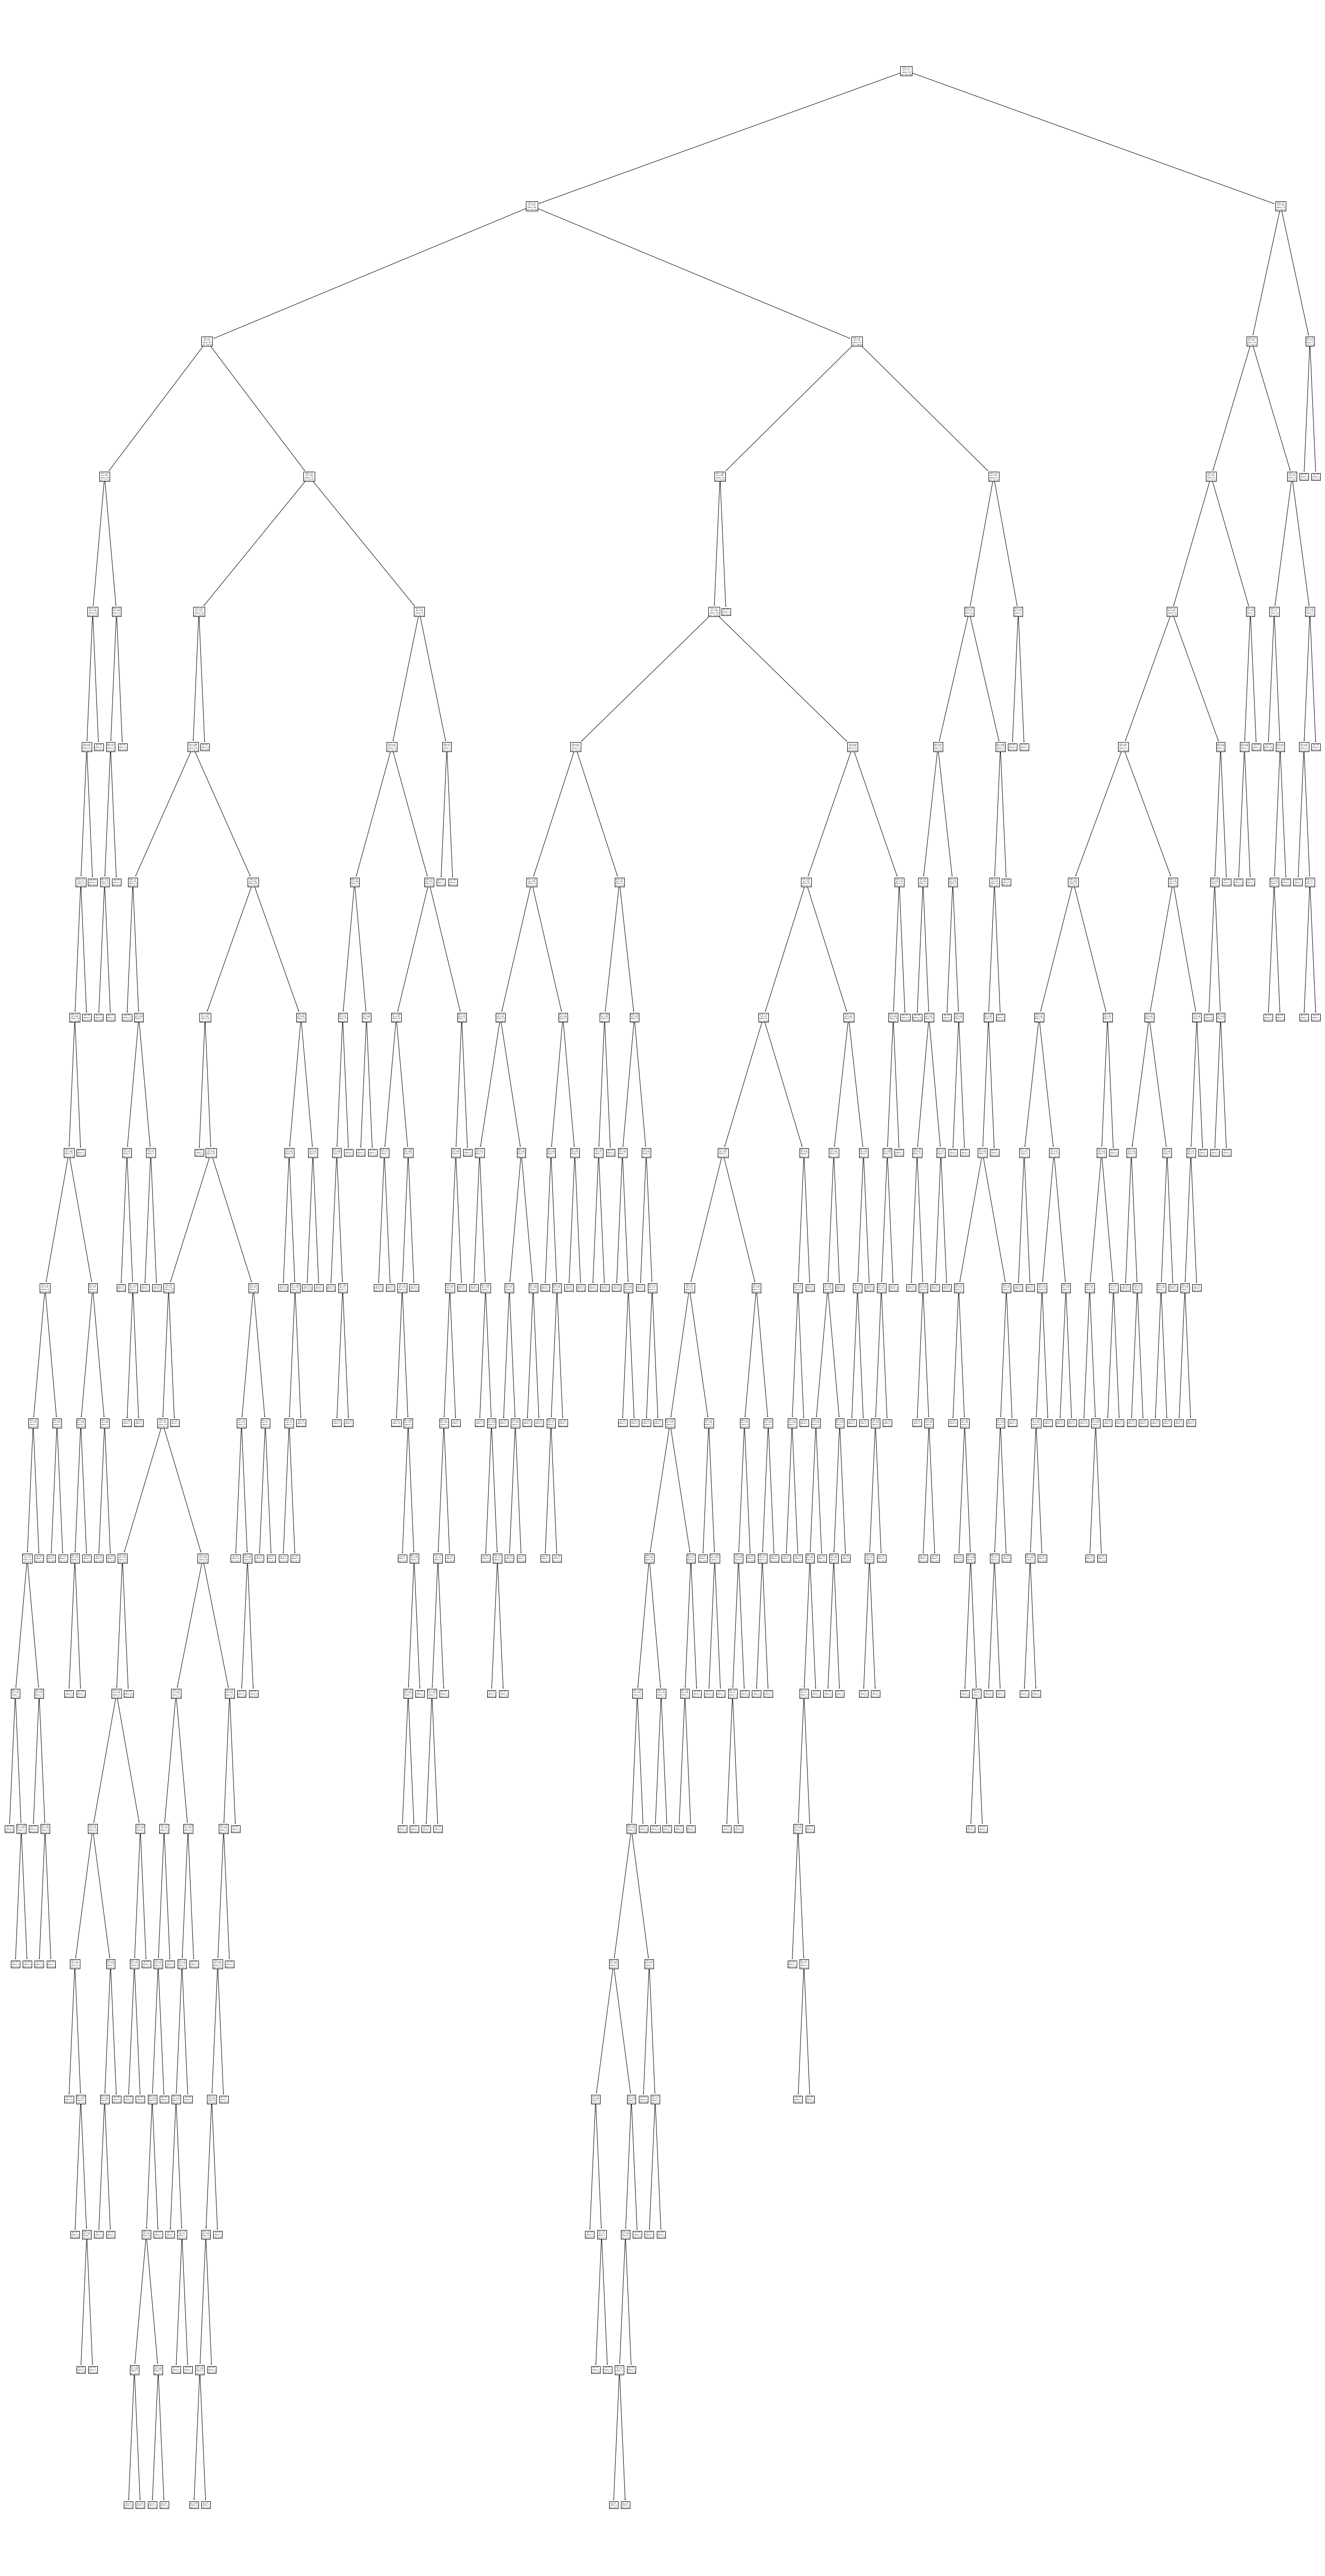

In [124]:
from sklearn import tree
import matplotlib.pyplot as plt

rfgrid = rf.best_estimator_
rfgrid.fit(x_train,y_train)

rfgrid.estimators_

plt.figure(figsize=(50,100))
tree.plot_tree(rfgrid.estimators_[0]);fig.savefig('rf_individualtree.png')

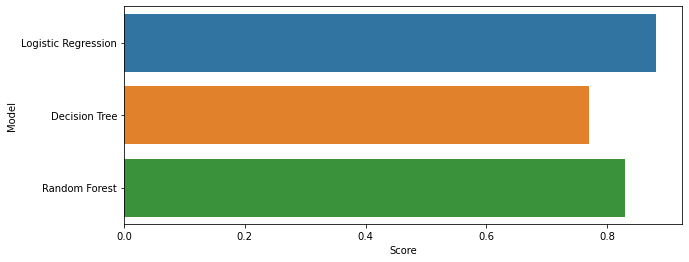

In [125]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest', ],
    'Score' : [accuracy_score(y_test,test_pred_lr), accuracy_score(y_test,test_pred_dt_grid), 
               accuracy_score(y_test,test_pred_rfgrid)]
})


models.sort_values(by = 'Score', ascending = False)

plt.figure(figsize = (10, 4))

sns.barplot(x = 'Score', y = 'Model', data = models)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier('max_depth': 18, 
                           'max_features': 6, 
                           'n_estimators': 200)
rf.fit(x_train,y_train)